
Pens and Printers founded in 1984

The objective was to identify the most efficient sales approach for Pens and Printers' new product line, which was launched six weeks ago. The company offers a wide range of high-quality office products, but it does not manufacture them. The sales team employed three different methods to sell the new product line, but they were unsure which approach was the most effective.

The three sales methods were email, call, and email & call. The email approach involved sending two emails, one when the product line was launched and another three weeks later. The call approach involved calling customers and spending an average of thirty minutes per customer. The email & call method involved sending an email first and then following up with a call a week later, with an average of ten minutes per customer on the phone.

As the sales team did not have a specific metric to assess the effectiveness of each method, I developed a metric to compare the performance of all three methods. I analyzed the results and ranked the methods from the best to worst sales method and I provided a recommendation to the sales team.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns

In [2]:
sales = pd.read_csv('product_sales.csv')

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


I examined the structure of the dataset using the .info() function and found that it contained 8 columns and 15,000 rows, except for the revenue column, which had over 1,000 missing values. Rather than dropping these rows, I decided to replace the missing values with the average revenue generated by the different sales approaches. To do this, I grouped the data by sales approach and computed the average revenue for each approach. Then, I used these averages to fill in the missing revenue values for each corresponding sales method. For example, if the average revenue generated from phone calls was 47.12 USD, I used this value to replace all missing revenue values for the "call" sales method. This approach was more precise than using the overall average revenue, as it allowed me to maintain the revenue per sales method without introducing bias into the analysis.
The datatype for all columns was consistent with the descriptions provided in the dataset. However, I did find some formatting issues in the "sales_method" column. Specifically, some entries were in uppercase letters, lowercase letters or were misspelled. 
To address this, I used the replace() function to replace all instances of "EM + CALL" with "EMAIL + CALL".

I used the str. lower() function to convert all entries to lowercase. This ensured that the sales method names were consistent and properly formatted throughout the dataset.

In [4]:
sales['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [5]:
sales['sales_method'] = sales['sales_method'].replace('em + call','Email + Call')

In [6]:
sales['sales_method'] = sales['sales_method'].str.lower()

In [7]:
sales.groupby('sales_method')['revenue'].mean()

sales_method
call             47.597467
email            97.127684
email + call    183.651233
Name: revenue, dtype: float64

In [8]:
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [9]:
sales.loc[sales['sales_method']=='email','revenue'] = sales.loc[sales['sales_method']=='email','revenue'].fillna(97.12)

In [10]:
sales.loc[sales['sales_method']=='email + call','revenue']= sales.loc[sales['sales_method']=='email + call','revenue'].fillna(183.65)

In [11]:
sales.loc[sales['sales_method']=='call','revenue']= sales.loc[sales['sales_method']=='call','revenue'].fillna(183.65)

In [12]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [13]:
sales.head(20)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,email,2e72d641-95ac-497b-bbf8-4861764a7097,10,97.12,0,24,Arizona
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,97.12,3,25,Indiana
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


In [14]:
conditions = [sales['sales_method']== 'email',sales['sales_method']=='email + call',sales['sales_method']=='call']

In [15]:
values= [4,12,30]

In [16]:
sales['time_spent'] = np.select(conditions,values)

In [17]:
sales.head(10)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,time_spent
0,2,email,2e72d641-95ac-497b-bbf8-4861764a7097,10,97.12,0,24,Arizona,4
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas,12
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin,30
3,4,email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,97.12,3,25,Indiana,4
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois,4
5,6,call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi,30
6,4,email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia,4
7,1,email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma,4
8,5,email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts,4
9,5,call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri,30


To compare the revenue generated by each sales method against the time spent by sales reps, I created a new metric called "revenue per minute spent". The Company can use the metric in the future to measure success and solve their problem. 

For email sales, I assumed that it took an average of four minutes for a sales rep to write and send two emails to a client. While creating the first email for a new product line might take 2-3 hours or more, subsequent emails could be quickly copied and pasted to a company's entire client list. Although some emails might require more time if they need to be customized to a specific client.The company information section indicated that sending emails required little work for the sales team.

For sales made by phone the sales rep spent an average of 30 minutes on the phone with each client, as stated in the company information section.

For sales made using both email and phone, the sales rep sent an email first and then made a phone call one week later. Based on the company information section, I assumed that the sales rep spent 10 minutes on the phone call per customer and 12 minutes total to send an email and make a phone call.

To create the "time spent" column, I used the np. select(conditions, values) function, and I used the "revenue" and "time spent" columns to calculate the "revenue per minute spent" metric. This allowed me to compare the efficiency of the three sales methods and determine which generated the most revenue in the shortest amount of time spent contacting or talking with the client.


In [18]:
sales['revenue/minute'] = round(sales['revenue']/sales['time_spent'],2)

In [19]:
sales

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,time_spent,revenue/minute
0,2,email,2e72d641-95ac-497b-bbf8-4861764a7097,10,97.12,0,24,Arizona,4,24.28
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas,12,18.79
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin,30,1.75
3,4,email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,97.12,3,25,Indiana,4,24.28
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois,4,22.62
...,...,...,...,...,...,...,...,...,...,...
14995,4,call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania,30,1.69
14996,5,call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas,30,1.74
14997,1,call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia,30,1.16
14998,6,call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey,30,2.16


In [20]:
sales.groupby('sales_method')['revenue/minute'].mean()

sales_method
call             1.751927
email           24.281757
email + call    15.303729
Name: revenue/minute, dtype: float64

Based on the "revenue per minute spent" metric that I calculated, the email method was the most efficient, generating an average of 24 USD per minute spent contacting clients. The email and call method ranked second with an average of 15 USD per minute spent  contacting clients through email and phone. Finally, the least efficient method was calling the client, with only 1.75 USD generated per minute spent talking to the client. This method required an average of 30 minutes to close a deal, which is much longer than the other two sales approaches. Therefore, the data suggests that the email approach is the best sales method for the company based on revenue generation and time efficiency.

In [21]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
 8   time_spent         15000 non-null  int64  
 9   revenue/minute     15000 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 1.1+ MB


In [22]:
sales['sales_method'].value_counts()

email           7466
call            4962
email + call    2572
Name: sales_method, dtype: int64

In [23]:
sales.groupby('customer_id')[['sales_method','nb_sold']].sum().reset_index()

,customer_id,nb_sold
0,00019f95-cd18-4a2a-aa62-512cc6b17ac5,12
1,00020b38-1ebb-427f-88d1-c60f3c426cfe,12
2,0002aed1-1a1f-4b20-845f-7a4b8cc9977a,16
3,00058065-ed47-4bc0-b74e-6803d0b67644,8
4,0011e7a6-9bda-4624-a115-f39866330cc8,12
...,...,...
14995,fff2ac99-1300-4a02-8aa0-ce6440f7ce6f,12
14996,fff7398c-87d7-4baa-844c-a93da3d78454,8
14997,fff8d038-8306-46a6-8c12-e1416e0dd978,10
14998,fffc2b37-eb7f-40fe-91d6-632b0a3ecc36,9


In [24]:
sales['customer_id'].duplicated().sum()

0

In [25]:
sales['sales_method'].value_counts()

email           7466
call            4962
email + call    2572
Name: sales_method, dtype: int64

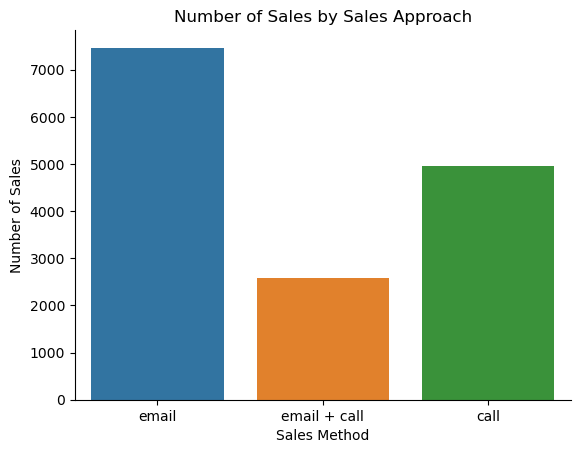

In [26]:
sns.countplot(x='sales_method',data=sales)
sns.despine()
plt.title('Number of Sales by Sales Approach')
plt.ylabel('Number of Sales')
plt.xlabel('')
plt.xlabel('Sales Method')


plt.show()

I used a barplot to illustrate the distribution of the number of customers for each sales approach. This information can provide the sales team with a better understanding of where most sales are coming from.
From the barplot, we can see that out of the 15,000 transactions, over 7,400 sales were made after the sales rep contacted clients twice through email. 4,962 transactions were made after the salesmen called the client. The lowest number of sales came from sending an email a week before the sales call. 

In [27]:
sales['sales_method'].value_counts()

email           7466
call            4962
email + call    2572
Name: sales_method, dtype: int64

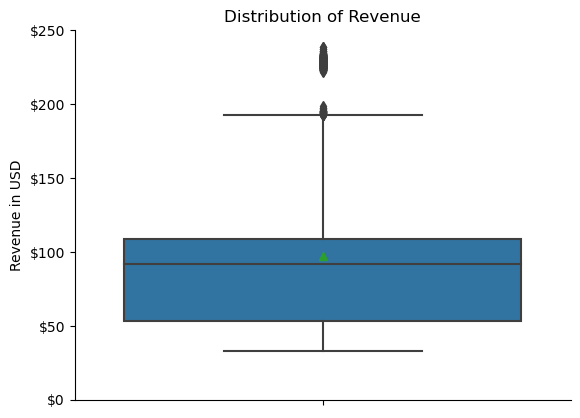

In [28]:
sns.boxplot(y='revenue',data=sales,whis=1.5,showmeans='True')
plt.title('Distribution of Revenue')
plt.ylabel('Revenue in USD')
plt.yticks([0,50,100,150,200,250],['$0','$50','$100','$150','$200','$250'])
sns.despine()

Comparing the revenue distribution among the three sales methods using a boxplot can help us identify differences in revenue generated. The boxplot shows us the median, interquartile range, outliers, and the maximum and minimum transaction amounts for each sales method.

Based on the boxplot, the email method has the highest median revenue, followed by the email and call method and the call method. 

The interquartile range was 55 USD and tells us that there's a moderate spread between the 25th percentile of revenue and 75th percentile of the revenue. The average transaction amount was 97.2 USD. 

In [29]:
sales['revenue'].describe()

count    15000.000000
mean        97.220386
std         48.610421
min         32.540000
25%         53.040000
50%         91.865000
75%        108.745000
max        238.320000
Name: revenue, dtype: float64

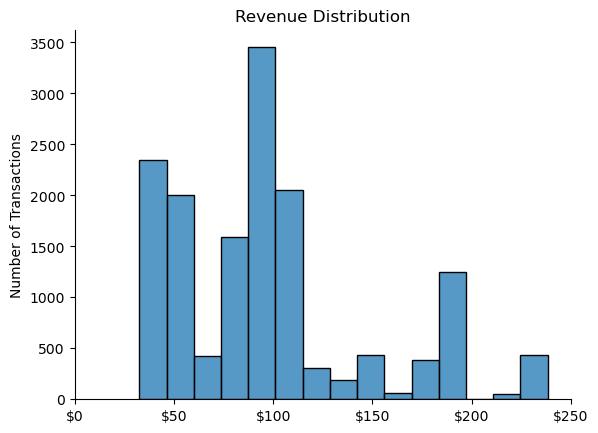

In [30]:
sns.histplot(x='revenue',data=sales,bins=15)
sns.despine()
plt.ylabel('Number of Transactions')
plt.xlabel('')
plt.title('Revenue Distribution')
plt.xticks([0,50,100,150,200,250],['$0','$50','$100','$150','$200','$250'])
plt.show()

The revenue distribution is slightly skewed to the right, with a most frequent transaction amount of 97.12 USD, an average of 97.22 USD, and a median of 91.6 USD. However, the presence of outliers in the dataset means that the spread of the revenue is significant, with a standard deviation of 48.6 USD. The distribution of revenue is not clearly defined, with different transaction amount peaks present. Therefore, the revenue distribution is not normally distributed.

In [31]:
sales['revenue'].mode()

0    97.12
Name: revenue, dtype: float64

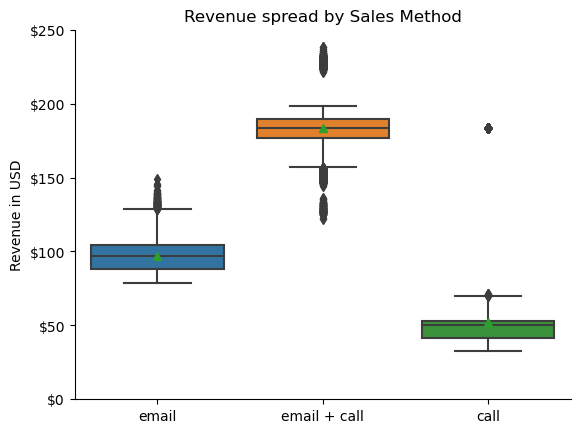

In [32]:
sns.boxplot(x='sales_method',y='revenue',data=sales,whis=1.5,showmeans=True)
plt.title('Revenue spread by Sales Method')
sns.despine()
plt.ylabel('Revenue in USD')
plt.yticks([0,50,100,150,200,250],['$0','$50','$100','$150','$200','$250'])
plt.xlabel('')
plt.show()

The boxplot analysis demonstrates that the sales methods differ significantly in their revenue generation. Notably, the email plus call method had a greater number of outliers on both ends of the distribution than the other two methods. It also had the highest median transaction amount at 183 USD, which was substantially higher than the median of the other methods. The call method had the lowest number of outliers and the lowest median revenue generated. The email plus call method also had the highest single transaction amount among the sales methods. While it had the least number of transactions, it had the highest average revenue generated per sale. The email plus call method had the largest spread of revenue among the sales methods. These findings suggest that the sales team may need to tailor their approach based on the client's preference to maximize revenue generated.

In [33]:
sales.groupby('sales_method')['revenue'].agg([np.mean,np.std,np.median,np.max,np.min])

,mean,std,median,amax,amin
sales_method,,,,,
call,52.560286,26.872503,49.935,183.65,32.54
email,97.127124,10.794271,96.835,148.97,78.83
email + call,183.651065,27.037965,183.650,238.32,122.11


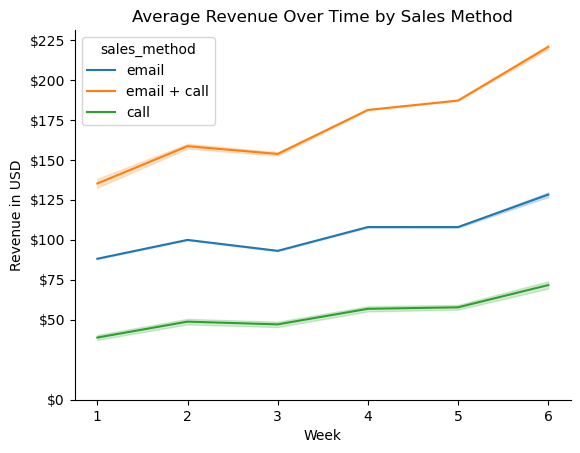

In [34]:
sns.lineplot(x='week',y='revenue',hue='sales_method',data=sales)
sns.despine()
plt.title('Average Revenue Over Time by Sales Method')
plt.ylabel('Revenue in USD')
plt.xlabel('Week')
plt.yticks([0,50,75,100,125,150,175,200,225],['$0','$50','$75','$100','$125','$150','$175','$200','$225'])
plt.show()

A lineplot was utilized to display the variation in revenue for each of the three sales methods across the six-week duration. The lineplot shows the average revenue amount per week and the total revenue per week for each sales method.

Throughout the six-week period, the email + call method consistently generated the highest average transaction amount per week. The difference in average transaction amounts between the three sales methods remained relatively constant throughout the six weeks. Additionally, the average transaction amount increased on average every week.

In [35]:
sales_over_time_avg=sales.groupby(['week','sales_method'])['revenue'].mean().reset_index()
sales_over_time_avg

,week,sales_method,revenue
0,1,call,38.871873
1,1,email,88.142533
2,1,email + call,135.185000
3,2,call,48.821764
4,2,email,99.917665
5,2,email + call,158.510400
6,3,call,47.107949
7,3,email,93.084643
8,3,email + call,153.662646
9,4,call,56.839443


In [36]:
sales_over_time=sales.groupby(['week','sales_method'])['revenue'].sum().reset_index()
sales_over_time 

,week,sales_method,revenue
0,1,call,29464.88
1,1,email,248121.23
2,1,email + call,20007.38
3,2,call,39301.52
4,2,email,148477.65
5,2,email + call,31702.08
6,3,call,42491.37
7,3,email,107047.34
8,3,email + call,55164.89
9,4,call,57123.64


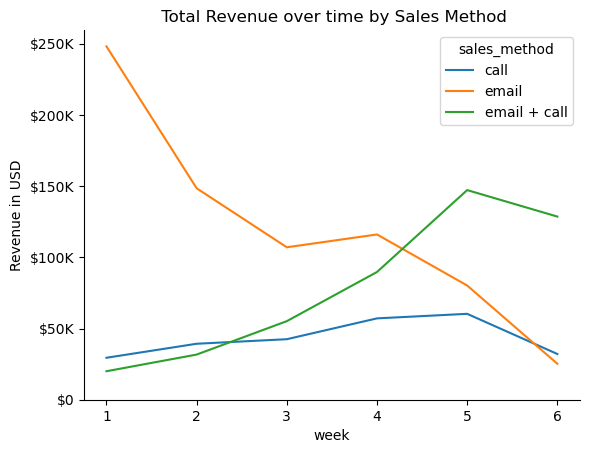

In [37]:
sns.lineplot(x='week',y='revenue',hue='sales_method',data=sales_over_time)
sns.despine()
plt.title(' Total Revenue over time by Sales Method')
plt.yticks([0,50000,100000,150000,200000,250000],['$0','$50K','$100K','$150K','$200K','$250K'])
plt.ylabel('Revenue in USD')
plt.show()

During the first week, the email method generated the highest revenue of almost 250,000 USD, which was significantly higher than the other two sales methods. However, there was a sharp decline in revenue for this method in the following weeks. In contrast, the email plus call method consistently increased the revenue for Pens and Printers over the six-week period. Interestingly, the email and email plus call methods brought in the same amount of revenue in the fourth week. The revenue from the call method gradually increased but dropped back to its initial level in week 6.

Overall, the email method performed exceptionally well in week 1, but the email plus call method closed the gap and outperformed the other two methods in the last one and a half weeks, finishing in first place in week 6. Additionally, in week 6, the email method underperformed the call method.

In [38]:
sales_per_week=pd.pivot_table(sales_over_time,index='week',columns='sales_method',values='revenue')

In [39]:
sales_per_week['total']= sales_per_week[['call','email','email + call']].sum(axis=1)
sales_per_week

sales_method,call,email,email + call,total
week,,,,
1,29464.88,248121.23,20007.38,297593.49
2,39301.52,148477.65,31702.08,219481.25
3,42491.37,107047.34,55164.89,204703.60
4,57123.64,116043.57,89682.50,262849.71
5,60313.16,80200.65,147194.87,287708.68
6,32109.57,25260.67,128598.82,185969.06


In [40]:
df = sales_per_week[['call','email','email + call']].div(sales_per_week['total'],axis=0)*100
df

sales_method,call,email,email + call
week,,,
1,9.901050,83.375893,6.723057
2,17.906550,67.649355,14.444095
3,20.757510,52.293824,26.948666
4,21.732434,44.148259,34.119307
5,20.963274,27.875645,51.161081
6,17.266082,13.583265,69.150653


In [41]:
df.reset_index()

sales_method,week,call,email,email + call
0,1,9.901050,83.375893,6.723057
1,2,17.906550,67.649355,14.444095
2,3,20.757510,52.293824,26.948666
3,4,21.732434,44.148259,34.119307
4,5,20.963274,27.875645,51.161081
5,6,17.266082,13.583265,69.150653


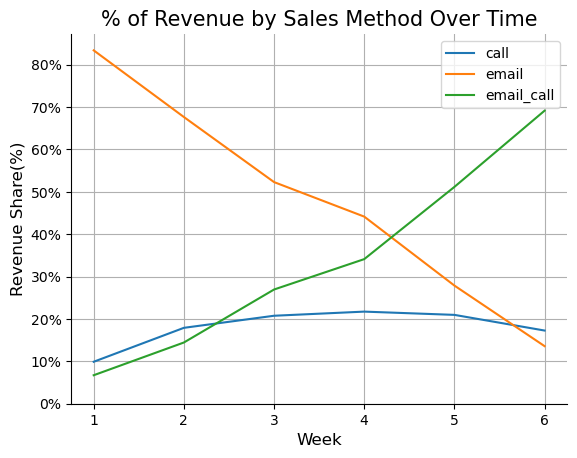

In [42]:
sns.lineplot(x='week',y='call',data=df,label='call')
sns.lineplot(x='week',y='email',data=df,label='email')
sns.lineplot(x='week',y='email + call',data=df,label='email_call')
plt.title('% of Revenue by Sales Method Over Time',size=15)
plt.yticks([0,10,20,30,40,50,60,70,80],['0%','10%','20%','30%','40%','50%','60%','70%','80%'])

plt.xlabel('Week',size=12)
sns.despine()
plt.ylabel('Revenue Share(%)',size=12)
plt.grid(True)


plt.show()

In [43]:
sales_week=sales.groupby(['week','sales_method'])['revenue'].sum().reset_index()
sales_week

,week,sales_method,revenue
0,1,call,29464.88
1,1,email,248121.23
2,1,email + call,20007.38
3,2,call,39301.52
4,2,email,148477.65
5,2,email + call,31702.08
6,3,call,42491.37
7,3,email,107047.34
8,3,email + call,55164.89
9,4,call,57123.64


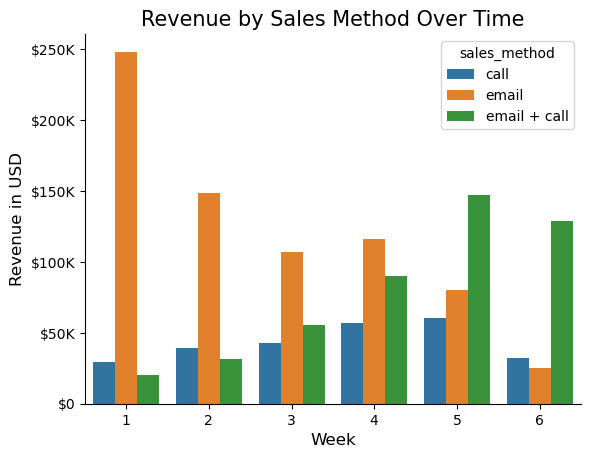

In [44]:

sns.barplot(x='week',y='revenue',hue='sales_method',data=sales_week,ci=None,estimator=sum)
plt.yticks([0,50000,100000,150000,200000,250000],['$0','$50K','$100K','$150K','$200K','$250K'])
plt.title('Revenue by Sales Method Over Time',size=15)
plt.xlabel('Week',size=12)
plt.ylabel('Revenue in USD',size=12)
sns.despine()


plt.show()

The two bar graphs provide insights into the revenue generated by different sales methods over a six-week period. The revenue generated by the email method showed a promising start, reaching nearly 250,000 USD in the first week, but then declined sharply in the following weeks. In contrast, the revenue generated by the email+call method was relatively weak in the first week, but gradually increased and surpassed the email method in the following weeks. The sales call method also saw a slight increase in revenue over time.

Overall, the total revenue from all sources was highest in the first week, reaching almost 300K USD, before dropping in weeks 2 and 3. It then rebounded in weeks 4 and 5, but dropped again to 180K in the final week. While the drop in revenue after the first week could be attributed to the initial high demand, the fluctuation in revenue in subsequent weeks requires further investigation.

In particular, it is not clear why there was a sudden decrease in revenue in weeks 2 and 3, and then a subsequent increase in weeks 4 and 5. Further analysis is necessary to identify potential factors that contributed to these changes in revenue.


Based on the Revenue by sales graph, it appears that the decline in the share of revenue from email sales was not due to the email+call method generating more revenue than the nearly 250K USD generated by email sales in the first week. Rather, it was primarily due to the total revenue generated by the email method decreasing over time. In other words, the declining share of revenue from email sales is more closely tied to a decrease in the absolute revenue generated by that method, rather than the email+call method surpassing the initial revenue generated by the email method in week one.



The lineplot provides a clear visualization of the percentage of revenue generated by each sales method over the six week period. The email method had a tremendous start in week 1, generating a staggering 83% of the total revenue. However, its percentage of revenue sharply declined in the following weeks. On the other hand, the email+call method started slowly, generating only 6.7% of the total revenue in week 1, but its percentage of revenue steadily increased over the six week period, becoming the dominant sales method by the end of week 6 with 69% of the total revenue.

The sales call method also had a small percentage of revenue in the first week, generating only 9% of the total revenue. However, its percentage of revenue remained relatively stable over the six week period , with approximately 17% of the total revenue generated through sales calls in the last week.

Although the email method had a strong start, the upward trend of the email+call method suggests that it may become the primary revenue generator in the future. However, it is still early to make a definitive decision on this matter, and further observation is necessary to determine the most effective sales method.

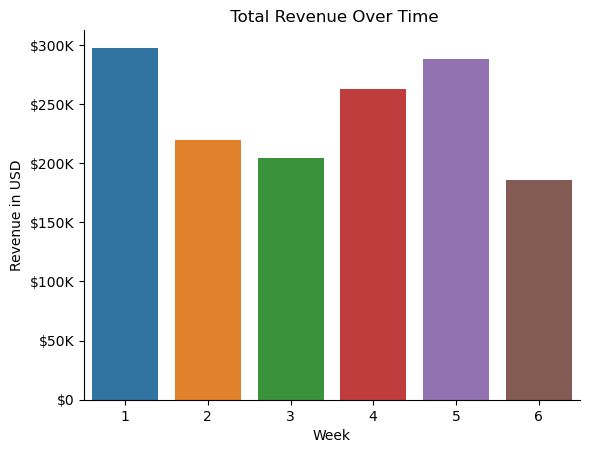

In [45]:
sns.barplot(x='week',y='revenue',data=sales,estimator=sum,ci=None) 
plt.title(' Total Revenue Over Time')
plt.xlabel('Week')
plt.ylabel('Revenue in USD')
sns.despine()
plt.yticks([0,50000,100000,150000,200000,250000,300000],['$0','$50K','$100K','$150K','$200K','$250K','$300K'])

plt.show()

In [46]:
sales.groupby('sales_method')['revenue'].sum()

sales_method
call            260804.14
email           725151.11
email + call    472350.54
Name: revenue, dtype: float64

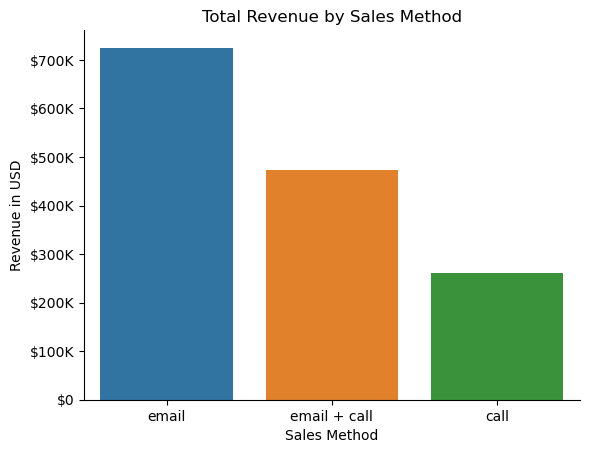

In [47]:
sns.barplot(x='sales_method',y='revenue',data=sales,estimator=sum,ci=None)
sns.despine()
plt.title('Total Revenue by Sales Method')
plt.xlabel('')
plt.ylabel('Revenue in USD')
plt.yticks([0,100000,200000,300000,400000,500000,600000,700000],
           ['$0','$100K','$200K','$300K','$400K','$500K','$600K','$700K'])
plt.xlabel('Sales Method')
plt.show()

In [48]:
sales.groupby('sales_method')['revenue'].sum()

sales_method
call            260804.14
email           725151.11
email + call    472350.54
Name: revenue, dtype: float64

Using a bar graph, I compared the total revenue brought in by each sales method over the six weeks since the new product line launch. The results clearly show that the email method outperformed the other two methods, while also requiring less effort and time from sales reps. This graph can be used to make a case for prioritizingt the email method over the other two methods.

In total, the email approach generated just over 700,000 USD, which is significantly more than the second best sales method, email+call, that brought in a little over 450,000 USD. The call method had the lowest revenue, generating just over 260,000 USD.

In [49]:
conditions = [sales['sales_method']=='email',sales['sales_method']=='email + call',sales['sales_method']=='call']

In [50]:
values = [4,12,15]

In [51]:
sales['new_minute'] = np.select(conditions,values)

In [52]:
sales['revenue/new_minute'] = sales['revenue']/sales['new_minute']

In [53]:
sales.groupby('sales_method')['revenue/new_minute'].mean()

sales_method
call             3.504019
email           24.281781
email + call    15.304255
Name: revenue/new_minute, dtype: float64

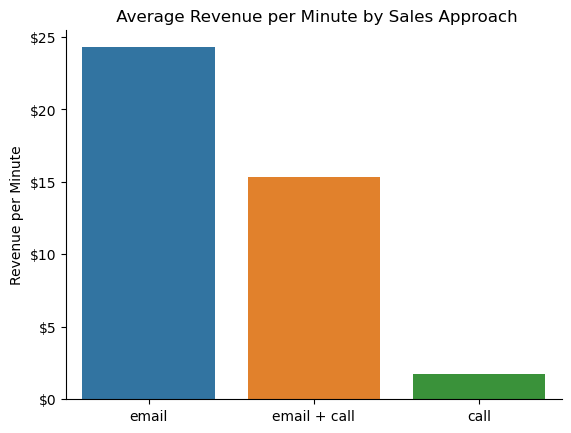

In [54]:
sns.barplot(x='sales_method',y='revenue/minute',data=sales,ci=None)
sns.despine()
plt.title(' Average Revenue per Minute by Sales Approach')
plt.ylabel("Revenue per Minute")
plt.xlabel('')
plt.yticks([0,5,10,15,20,25],['$0','$5','$10','$15','$20','$25'])
plt.show()

Based on my analysis, I recommend that the company prioritize the email approach as the best sales method. There are several reasons for this recommendation.

Firstly, the email approach generates the highest revenue to minute metric, indicating that sales reps can make big sales while spending less time and effort compared to the other two methods. On average, the email method generates $24 per minute spent contacting clients, which is an excellent return.

Secondly, the email method had the highest number of sales, with over 7400 transactions coming through this channel.

Thirdly, the email method generated over $700,000 USD over the six weeks, outperforming the other two sales methods by a large margin.

The second best method is the email + call approach. This method has the highest average revenue per transaction, meaning that sales through this channel generate significant revenue for the company. Additionally, the revenue from this channel increased steadily over the six weeks.While the email method initially generated a significant percentage of the companies revenue, the increasing trend of the email+call method implies that it has the potential to become the primary revenue generator in the future. Careful monitoring of this trend could have a significant impact on the company's success.



The call method performed the worst, with the lowest revenue per minute metric and generating only about $260,000 USD in revenue. However, almost 5000 or one-third of the number of sales came through this channel. As such, I recommend continuing to use this method but with limitations such as ensuring that no sales call lasts longer than 15 minutes and decreasing the number of sales calls.

To improve sales, I recommend focusing on writing more high-quality emails specialized to the client's needs. I suggest increasing the number of emails to 4 or 6 per new product launch. For the email + call approach, the number of emails should be increased to 3 or 4, followed by an 8-10 minute call. If these recommendations improve sales, the company could avoid the call-only method and focus entirely on the other two sales methods.

In the meantime, sales reps could try to use upselling techniques to increase the average transaction amount per sales for phone only calls.

In [55]:
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,time_spent,revenue/minute,new_minute,revenue/new_minute
0,2,email,2e72d641-95ac-497b-bbf8-4861764a7097,10,97.12,0,24,Arizona,4,24.28,4,24.280000
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas,12,18.79,12,18.789167
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin,30,1.75,15,3.503333
3,4,email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,97.12,3,25,Indiana,4,24.28,4,24.280000
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois,4,22.62,4,22.622500


In [56]:
customers=sales.groupby('customer_id')[['nb_sold','revenue','years_as_customer','nb_site_visits']].sum()

In [57]:
customers.sort_values(by='revenue',ascending=False).head(20) 

,nb_sold,revenue,years_as_customer,nb_site_visits
customer_id,,,,
21513a8f-f7aa-4ff7-b212-b213117c5a07,16,238.32,0,36
5a34f271-29fd-4777-a9d6-ffd5076f4f55,16,238.23,3,33
0002aed1-1a1f-4b20-845f-7a4b8cc9977a,16,237.19,2,29
535ddeb0-ca5d-40f2-a0e0-733c864fe686,16,236.75,2,30
68c72896-b99a-44e8-89ac-061ef612f20e,16,235.59,6,32
86521b15-4742-4f01-8ba3-ea7d172fe494,16,235.58,1,28
1723838d-ea53-4477-93d2-61fecb7d750f,16,235.40,2,29
35b1f346-b0ed-4ab8-976e-504942488c9c,16,234.98,3,29
53e4d803-2c9f-43b7-a970-a996b33d4619,16,234.44,1,30


The Sales rep asked me to find some differences between the cutomers in each group so I created two scatterplots to compare  if a relationships exists between number of times the companies sites were visited and revenue and revenue and customer loyalty. I also analyzed the states where most of our big clients are located. This information will provide the sales team with information that they can use to increase revenue.  

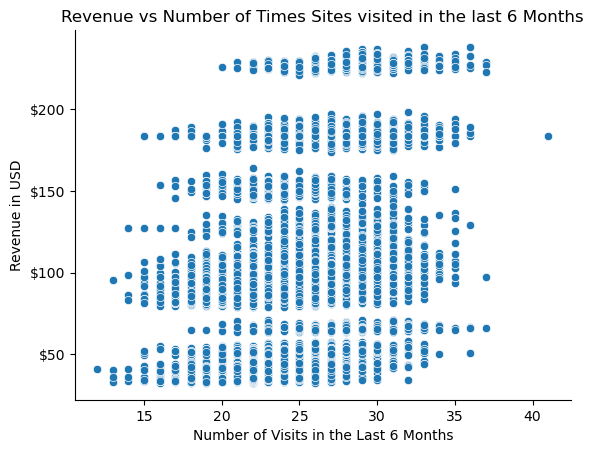

In [58]:
sns.scatterplot(x='nb_site_visits',y='revenue',data=customers)
plt.title('Revenue vs Number of Times Sites visited in the last 6 Months')
sns.despine()
plt.ylabel('Revenue in USD')
plt.xlabel("Number of Visits in the Last 6 Months")
plt.yticks([50,100,150,200],['$50','$100','$150','$200'])


plt.show()

Using a scatterplot, I examined the relationship between revenue and number of site visits over the past six months. The scatterplot reveals a weak positive correlation between the two variables, with a correlation coefficient of 0.312. Thus, while there is a positive association between the number of visits and revenue, it is not a strong predictor of sales.

In [59]:
customers.corr()

,nb_sold,revenue,years_as_customer,nb_site_visits
nb_sold,1.000000,0.674851,-0.099117,0.490718
revenue,0.674851,1.000000,-0.060941,0.312978
years_as_customer,-0.099117,-0.060941,1.000000,-0.048860
nb_site_visits,0.490718,0.312978,-0.048860,1.000000


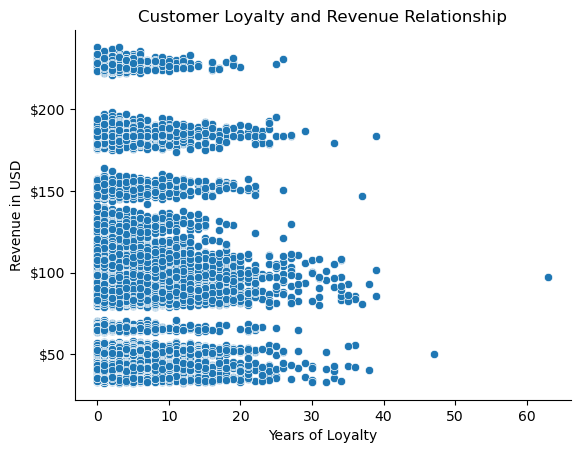

In [60]:
sns.scatterplot(y='revenue',x='years_as_customer',data=customers)
plt.title('Customer Loyalty and Revenue Relationship')
sns.despine()
plt.ylabel('Revenue in USD')
plt.xlabel("Years of Loyalty")
plt.yticks([50,100,150,200],['$50','$100','$150','$200'])


plt.show()


I discovered an unexpected insight that contradicts the conventional belief that long-term customers are likely to spend more money. The correlation between revenue and the length of time customers have been buying from us is negative and close to zero, indicating that there is no clear relationship between customer loyalty and higher sales over the past six weeks.

In [61]:
customers.sort_values(by='revenue',ascending=False).head(20)

,nb_sold,revenue,years_as_customer,nb_site_visits
customer_id,,,,
21513a8f-f7aa-4ff7-b212-b213117c5a07,16,238.32,0,36
5a34f271-29fd-4777-a9d6-ffd5076f4f55,16,238.23,3,33
0002aed1-1a1f-4b20-845f-7a4b8cc9977a,16,237.19,2,29
535ddeb0-ca5d-40f2-a0e0-733c864fe686,16,236.75,2,30
68c72896-b99a-44e8-89ac-061ef612f20e,16,235.59,6,32
86521b15-4742-4f01-8ba3-ea7d172fe494,16,235.58,1,28
1723838d-ea53-4477-93d2-61fecb7d750f,16,235.40,2,29
35b1f346-b0ed-4ab8-976e-504942488c9c,16,234.98,3,29
53e4d803-2c9f-43b7-a970-a996b33d4619,16,234.44,1,30


In [62]:
state = sales.groupby('state')[['revenue','nb_sold','years_as_customer','customer_id']].sum()

In [63]:
state_rev=state.sort_values(by='revenue',ascending=False).head(10)
state_rev

,revenue,nb_sold,years_as_customer
state,,,
California,179755.36,18859,9289
Texas,117417.54,11957,5983
New York,91642.85,9734,4787
Florida,88169.13,9201,4271
Illinois,58534.93,6143,3151
Pennsylvania,58042.47,5979,3275
Ohio,54468.65,5699,2560
Michigan,49090.19,4998,2542
Georgia,47627.37,4930,2461


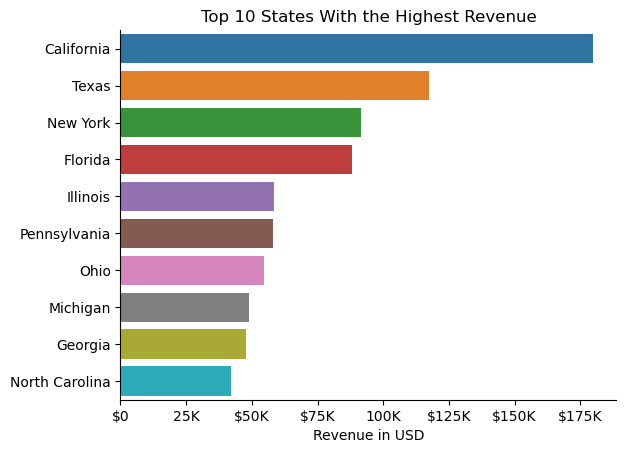

In [64]:
sns.barplot(x='revenue',y=state_rev.index,data=state_rev)
sns.despine()
plt.title('Top 10 States With the Highest Revenue')
plt.xlabel("Revenue in USD")
plt.ylabel("")
plt.xticks([0,25000,50000,75000,100000,125000,150000,175000],['$0','25K','$50K','$75K','100K','$125K','$150K','$175K'])

plt.show() 

According to the bar graph, the top revenue-generating states for Pens and Printers are California, Texas, New York, Florida, and Illinois, among others. The revenue generated by California was over 175,000 USD, which is significantly higher than the average revenue generated by states. Therefore, it is recommended that the company should shift its focus towards these top ten states to maximize revenue.

In [65]:
state['revenue'].mean()

29166.115799999996

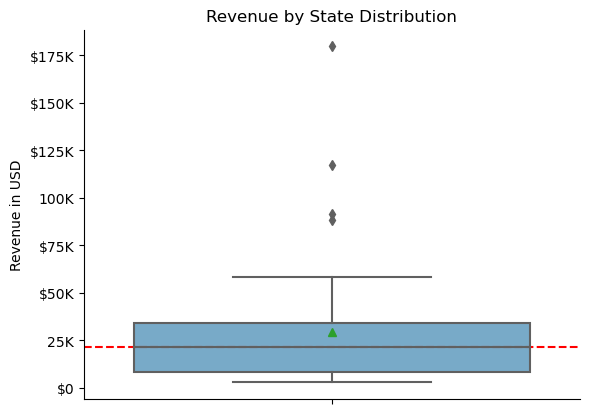

In [66]:
sns.boxplot(y='revenue',data=state,whis=1.5,showmeans=True,palette='Blues')
sns.despine()
plt.title('Revenue by State Distribution')
plt.ylabel('Revenue in USD')
plt.yticks([0,25000,50000,75000,100000,125000,150000,175000],['$0','25K','$50K','$75K','100K','$125K','$150K','$175K'])
plt.axhline(state['revenue'].median(),color='red',linestyle='--')
plt.show()

Using a boxplot, I examined the revenue distribution among all 50 states to determine if there were any significant differences. The median revenue per state was found to be 21,627 USD. However, there were four states that stood out as outliers with much higher revenue, with the highest at 179,955 USD. On average, states brought in 29,166 USD in revenue, but the spread was large at 32,609 USD.The boxplot provides evidence to support the idea of increasing focus on the four states with the highest revenue, while also exploring why other states are not generating as much revenue. This could involve investigating potential reasons for lower sales in those states, such as insufficient advertising or lack of awareness of our company among potential customers. One approach to address this issue could be to advertise on different platforms, such as TikTok, Meta, Google, or local newspapers. We could also consider offering special discounts or promotions to customers in those states. Another option might be to shift our attention to the top ten or twenty highest generating states.

In [67]:
state['revenue'].describe()

count        50.000000
mean      29166.115800
std       32609.224838
min        2931.080000
25%        8546.330000
50%       21627.180000
75%       34312.282500
max      179755.360000
Name: revenue, dtype: float64

In [68]:
sales

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,time_spent,revenue/minute,new_minute,revenue/new_minute
0,2,email,2e72d641-95ac-497b-bbf8-4861764a7097,10,97.12,0,24,Arizona,4,24.28,4,24.280000
1,6,email + call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas,12,18.79,12,18.789167
2,5,call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin,30,1.75,15,3.503333
3,4,email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,97.12,3,25,Indiana,4,24.28,4,24.280000
4,3,email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois,4,22.62,4,22.622500
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,4,call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania,30,1.69,15,3.388000
14996,5,call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas,30,1.74,15,3.488667
14997,1,call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia,30,1.16,15,2.324667
14998,6,call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey,30,2.16,15,4.326667


In [69]:
method=sales.groupby('sales_method').mean()

In [70]:
sales.sort_values(by='nb_sold',ascending=False).head(20)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,time_spent,revenue/minute,new_minute,revenue/new_minute
13756,6,email + call,6714db9b-2567-4062-9ea7-83006e303b2a,16,234.10,1,28,New Jersey,12,19.51,12,19.508333
3490,6,email + call,21513a8f-f7aa-4ff7-b212-b213117c5a07,16,238.32,0,36,North Carolina,12,19.86,12,19.860000
6792,6,email + call,535ddeb0-ca5d-40f2-a0e0-733c864fe686,16,236.75,2,30,Florida,12,19.73,12,19.729167
1426,6,email + call,fce8075a-23bc-45ff-b537-793a2ddd99c0,16,234.08,0,30,New York,12,19.51,12,19.506667
2661,6,email + call,efd9156a-f466-4a5c-9e28-5960fb69b36c,16,233.32,13,28,Louisiana,12,19.44,12,19.443333
8423,6,email + call,0fd53854-68c9-49cb-a0d1-50f077860358,16,233.03,3,29,Connecticut,12,19.42,12,19.419167
13645,6,email + call,47fa33be-e4c7-491c-a42c-2bc653c28433,16,233.77,5,35,Ohio,12,19.48,12,19.480833
13434,6,email + call,6d4f9376-80e3-4da3-96b3-708564427fe9,16,232.68,5,32,New York,12,19.39,12,19.390000
1684,6,email + call,c1c73fb9-cf35-47e2-94d0-eec90bcada4d,16,233.80,0,30,Florida,12,19.48,12,19.483333
4719,6,email + call,a58667ad-d27c-480f-b000-1865ed1cb412,16,233.97,4,33,California,12,19.50,12,19.497500


In [71]:
nb_sold=sales.groupby('sales_method')['nb_sold'].mean().reset_index()

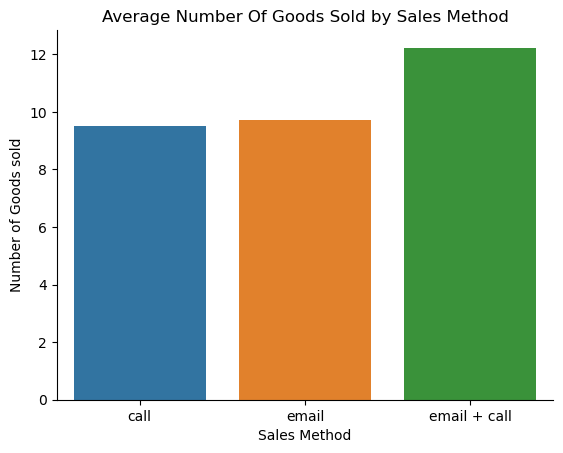

In [72]:
sns.barplot(x='sales_method',y='nb_sold',data=nb_sold)
sns.despine()
plt.title('Average Number Of Goods Sold by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Goods sold')


plt.show()

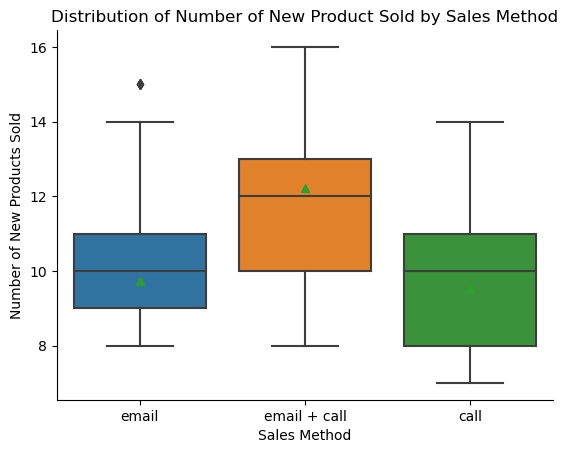

In [73]:
sns.boxplot(x='sales_method',y='nb_sold',data=sales,showmeans=True)
sns.despine()
plt.xlabel('Sales Method')
plt.ylabel('Number of New Products Sold')
plt.title('Distribution of Number of New Product Sold by Sales Method')
plt.show()

Customers that buy in large quantities say 15 and more products prefer to get an email with information a week before the sales call. The email+call method has the highest average new product sold. The top 20 largest sales by product sold were through the email+call method. This statisitcs indicated that organizations that buy in large quantities prefer the email+call method over the two other sales methods. If this trend continues, the sales team will be able to use a specific sales method for different types of clients. 


In [74]:


sales.groupby('sales_method')['nb_sold'].agg([np.median,np.mean,np.max,np.min,'count',
                                             lambda x: x.quantile(0.75)-x.quantile(0.25)])


,median,mean,amax,amin,count,<lambda_0>
sales_method,,,,,,
call,10.0,9.509674,14,7,4962,3.0
email,10.0,9.729306,15,8,7466,2.0
email + call,12.0,12.225505,16,8,2572,3.0


In [75]:
sales.groupby('sales_method')['nb_sold'].sum()

sales_method
call            47187
email           72639
email + call    31444
Name: nb_sold, dtype: int64

In [76]:
sales.groupby('sales_method')['nb_sold'].

SyntaxError: invalid syntax (3463171318.py, line 1)

In [ ]:
sales['nb_sold'].describe()

In [ ]:
sales[['sales_method','nb_sold']].describe()

In [ ]:
sales[sales['sales_method']=='call']['nb_sold'].describe()

In [78]:
sales.sort_values(by='revenue',ascending=False).head(20)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state,time_spent,revenue/minute,new_minute,revenue/new_minute
3490,6,email + call,21513a8f-f7aa-4ff7-b212-b213117c5a07,16,238.32,0,36,North Carolina,12,19.86,12,19.860000
12006,6,email + call,5a34f271-29fd-4777-a9d6-ffd5076f4f55,16,238.23,3,33,New York,12,19.85,12,19.852500
735,6,email + call,0002aed1-1a1f-4b20-845f-7a4b8cc9977a,16,237.19,2,29,California,12,19.77,12,19.765833
6792,6,email + call,535ddeb0-ca5d-40f2-a0e0-733c864fe686,16,236.75,2,30,Florida,12,19.73,12,19.729167
4238,6,email + call,68c72896-b99a-44e8-89ac-061ef612f20e,16,235.59,6,32,North Carolina,12,19.63,12,19.632500
6739,6,email + call,86521b15-4742-4f01-8ba3-ea7d172fe494,16,235.58,1,28,Pennsylvania,12,19.63,12,19.631667
13388,6,email + call,1723838d-ea53-4477-93d2-61fecb7d750f,16,235.40,2,29,South Dakota,12,19.62,12,19.616667
12659,6,email + call,35b1f346-b0ed-4ab8-976e-504942488c9c,16,234.98,3,29,Hawaii,12,19.58,12,19.581667
7336,6,email + call,53e4d803-2c9f-43b7-a970-a996b33d4619,16,234.44,1,30,New York,12,19.54,12,19.536667
13756,6,email + call,6714db9b-2567-4062-9ea7-83006e303b2a,16,234.10,1,28,New Jersey,12,19.51,12,19.508333
